<a href="https://colab.research.google.com/github/ZebelEmp/DevC_Assignment/blob/master/Team_5_Global_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 5 - Global Terrorism

![](https://www.start.umd.edu/gtd/images/START_GlobalTerrorismDatabase_TerroristAttacksConcentrationIntensityMap_45Years.png)

_For more information about the dataset, read [here](https://www.kaggle.com/START-UMD/gtd)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- Use `encoding ='ISO-8859-1'` when reading the .csv file
- There are many columns that are not really helpful for us. Can you identify and drop them?
- Can you draw a map of terrorism event locations?
- And more...

In [0]:
#install library for drawing geo map
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
     | 133.2MB 700kB/s
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756024 sha256=c704ab6230edd48bab19467585eecf00ae8a63e66f8ba33532bc5ff78793182f
  Stored in directory: /tmp/pip-ephem-wheel-cache-t7blpjc1/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [0]:
# Start your codes here!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation
from google.colab import drive
import folium
import folium.plugins
import io
import base64
import codecs
import plotly.graph_objs as go
import plotly.tools as tls
from IPython.display import HTML, display
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/terrorism.csv", encoding ='ISO-8859-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



In [0]:
df

eventid  iyear  ...  INT_ANY                     related
0       197000000001   1970  ...        0                         NaN
1       197000000002   1970  ...        1                         NaN
2       197001000001   1970  ...        1                         NaN
3       197001000002   1970  ...        1                         NaN
4       197001000003   1970  ...        1                         NaN
5       197001010002   1970  ...       -9                         NaN
6       197001020001   1970  ...        0                         NaN
7       197001020002   1970  ...       -9                         NaN
8       197001020003   1970  ...        0                         NaN
9       197001030001   1970  ...        0                         NaN
10      197001050001   1970  ...        0                         NaN
11      197001060001   1970  ...       -9                         NaN
12      197001080001   1970  ...        1                         NaN
13      197001090001   1970  ...       -9                         NaN
14      197001090002   1970  ...        0                         NaN
15      197001100001   1970  ...        1                         NaN
16      197001110001   1970  ...        1                         NaN
17      197001120001   1970  ...       -9                         NaN
18      197001120002   1970  ...       -9                         NaN
19      197001130001   1970  ...       -9                         NaN
20      197001140001   1970  ...       -9                         NaN
21      197001150001   1970  ...        0                         NaN
22      197001190002   1970  ...       -9                         NaN
23      197001190003   1970  ...       -9                         NaN
24      197001190004   1970  ...       -9                         NaN
25      197001200001   1970  ...        1                         NaN
26      197001210001   1970  ...        1                         NaN
27      197001220001   1970  ...        0                         NaN
28      197001220002   1970  ...       -9                         NaN
29      197001250001   1970  ...       -9                         NaN
...              ...    ...  ...      ...                         ...
181661  201712300019   2017  ...       -9                         NaN
181662  201712300020   2017  ...        0                         NaN
181663  201712300021   2017  ...       -9                         NaN
181664  201712300022   2017  ...        1                         NaN
181665  201712300023   2017  ...        0                         NaN
181666  201712300025   2017  ...        0                         NaN
181667  201712300026   2017  ...        0                         NaN
181668  201712310001   2017  ...       -9                         NaN
181669  201712310002   2017  ...       -9  201712300005, 201712310002
181670  201712310003   2017  ...        1                         NaN
181671  201712310004   2017  ...        1                         NaN
181672  201712310005   2017  ...        1                         NaN
181673  201712310006   2017  ...        1                         NaN
181674  201712310007   2017  ...        1                         NaN
181675  201712310008   2017  ...        1                         NaN
181676  201712310009   2017  ...        0                         NaN
181677  201712310010   2017  ...        0                         NaN
181678  201712310011   2017  ...       -9                         NaN
181679  201712310012   2017  ...        1                         NaN
181680  201712310013   2017  ...        1                         NaN
181681  201712310016   2017  ...        0                         NaN
181682  201712310017   2017  ...       -9                         NaN
181683  201712310018   2017  ...        0                         NaN
181684  201712310019   2017  ...        0                         NaN
181685  201712310020   2017  ...       -9                         NaN
181686  201712310022   

In [0]:
# rename column and take out specific column for analyzing
df.rename(columns={'iyear':'Year',\
                              'imonth':'Month',\
                              'iday':'Day',\
                              'country_txt':'Country',\
                              'region_txt':'Region',\
                              'city':"City",\
                              'attacktype1_txt':'AttackType',\
                              'target1':'Target',\
                              'nkill':'Killed',\
                              'nwound':'Wounded',\
                              'summary':'Summary',\
                              'gname':'Group',\
                              'targtype1_txt':'Target_type',\
                              'weaptype1_txt':'Weapon_type',\
                              'motive':'Motive'},inplace=True)
processedData=df[['Year','Month','Day','Country',\
                             'Region','City','latitude','longitude',\
                             'AttackType','Killed','Wounded','Target',\
                             'Summary','Group','Target_type','Weapon_type','Motive']]

In [0]:
processedData.info()
processedData.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
Year           181691 non-null int64
Month          181691 non-null int64
Day            181691 non-null int64
Country        181691 non-null object
Region         181691 non-null object
City           181257 non-null object
latitude       177135 non-null float64
longitude      177134 non-null float64
AttackType     181691 non-null object
Killed         171378 non-null float64
Wounded        165380 non-null float64
Target         181055 non-null object
Summary        115562 non-null object
Group          181691 non-null object
Target_type    181691 non-null object
Weapon_type    181691 non-null object
Motive         50561 non-null object
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


Year  Month  ...  Weapon_type                                          Motive
0  1970      7  ...      Unknown                                             NaN
1  1970      0  ...      Unknown                                             NaN
2  1970      1  ...      Unknown                                             NaN
3  1970      1  ...   Explosives                                             NaN
4  1970      1  ...   Incendiary                                             NaN
5  1970      1  ...     Firearms  To protest the Cairo Illinois Police Deparment
6  1970      1  ...     Firearms                                             NaN
7  1970      1  ...   Explosives                                             NaN
8  1970      1  ...   Incendiary     To protest the War in Vietnam and the draft
9  1970      1  ...   Incendiary     To protest the War in Vietnam and the draft

[10 rows x 17 columns]

In [0]:
processedData['Casualities']=processedData['Killed']+processedData['Wounded']
processedData.groupby("Year").sum().sort_values("Casualities",ascending=False).head(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Month     Day       latitude  ...   Killed  Wounded  Casualities
Year                                ...                               
2015  94167  235939  398489.570982  ...  38853.0  44043.0      72833.0

[1 rows x 7 columns]

In [0]:
print('Country with Highest Terrorist Attacks:',processedData['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',processedData['Region'].value_counts().index[0])
print(f'Maximum people killed in an attack are:',processedData['Killed'].max(),'that took place in',processedData.loc[processedData['Killed'].idxmax()].Country,)
print("The period of time that has the most terrorist attack is {} with {} attacks".format(processedData["Year"].value_counts().index[0],processedData["Year"].value_counts().index[1]))
print("The period of time that has the most terrorist casualities is {} with {} casualities".format(processedData.groupby("Year").sum().sort_values("Casualities",ascending=False).head(1).index[0],\
                                                                                                   processedData.groupby("Year").sum().sort_values("Casualities",ascending=False).head(1)["Casualities"].values[0].astype(int)))

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq
The period of time that has the most terrorist attack is 2014 with 2015 attacks
The period of time that has the most terrorist casualities is 2015 with 72833 casualities


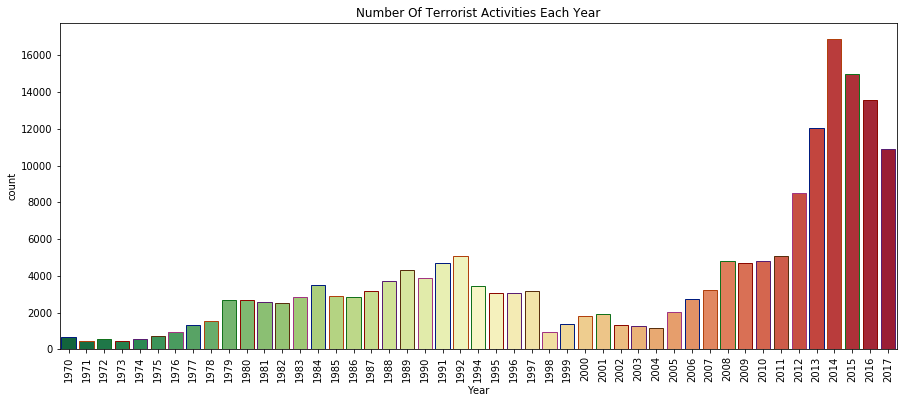

In [0]:
# Plot histogram for terrorist activities each year from 1970 to 2017
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=processedData,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()
# before 2004 terrorist activitie reached its peak in 1992 then continued to fluctuate before skyrocketing to reach new peak in 2014 and decreased afterwards

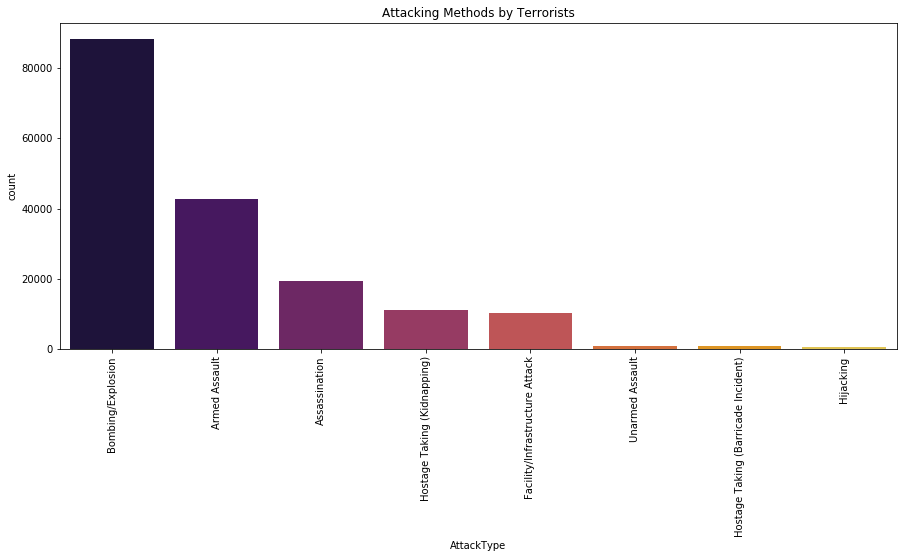

In [0]:
# plot histogram for actacking method
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=processedData[~(processedData["AttackType"] == "Unknown")],\
              palette='inferno',order=processedData[~(processedData["AttackType"] == "Unknown")]['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()
# as expected bombing is terrorist's favorite

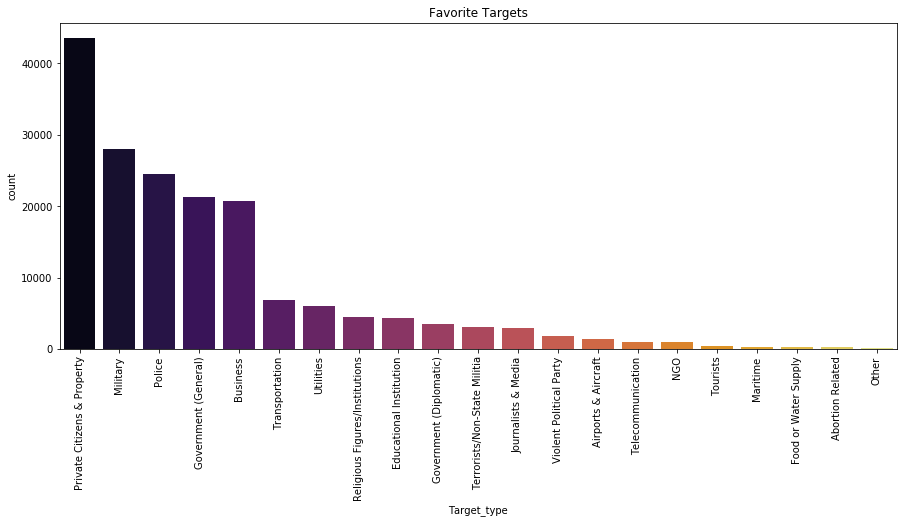

In [0]:
# plot favorite targets of terrorists
plt.subplots(figsize=(15,6))
sns.countplot(processedData[~(processedData["Target_type"] == "Unknown")]['Target_type'],\
              palette='inferno',order=processedData[~(processedData["Target_type"] == "Unknown")]['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()
# seem like private citizens such as VIP and property was mostly attacked

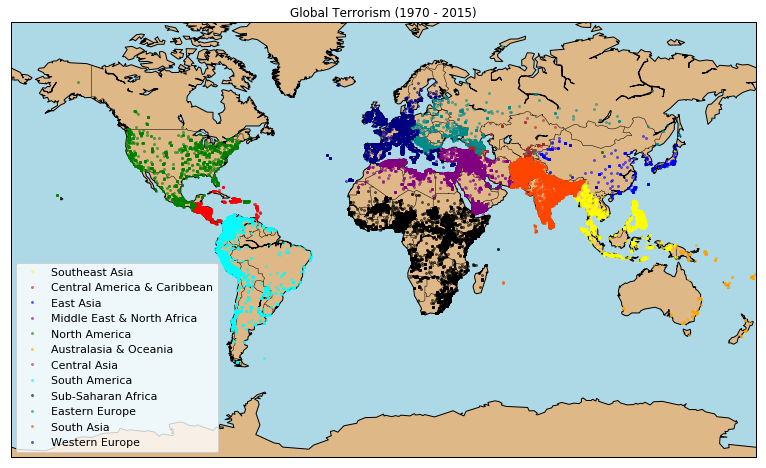

In [0]:
# plot occurence of terrorist on geo map
regions = list(set(processedData.Region))
colors = ['yellow', 'red', 'blue', 'purple', 'green', 'orange', 'brown',\
          'aqua', 'black', 'darkcyan', 'orangered', 'navy']
plt.figure(figsize=(15,8))
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='burlywood',lake_color='lightblue', zorder = 1)
m.drawmapboundary(fill_color='lightblue')

def pltpoints(region, color = None, label = None):
    x, y = m(list(processedData.longitude[processedData.Region == region].astype("float")),\
            (list(processedData.latitude[processedData.Region == region].astype("float"))))
    points = m.plot(x, y, "o", markersize = 2, color = color, label = label, alpha = .5)
    return(points)

for i, region in enumerate(regions):
    pltpoints(region, color = colors[i], label = region)  
    
plt.title("Global Terrorism (1970 - 2015)")
plt.legend(loc ='lower left', prop= {'size':11})
plt.show()
# mostly occurence: middle east, european countries, center and on the east coast of africa, west coast of south america, both west and east coast of america 

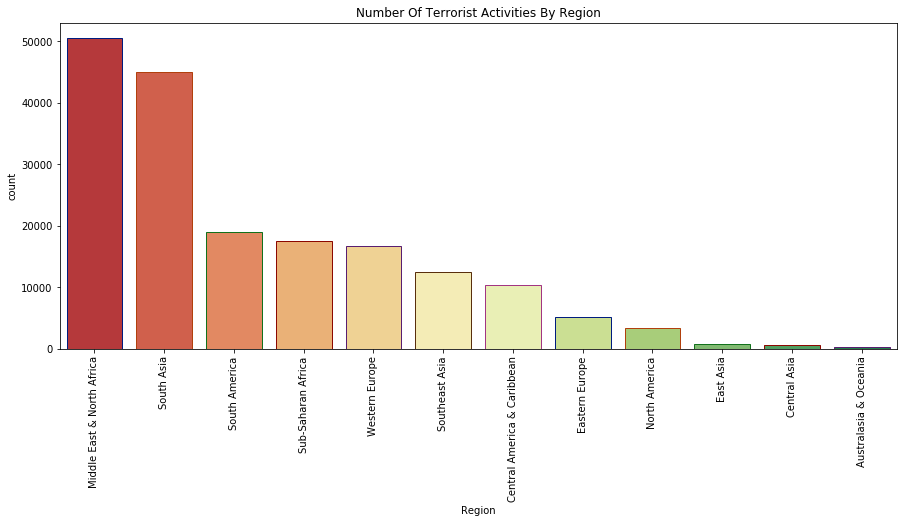

In [0]:
# plot the activities of terrorist grouped by region
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=processedData,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=processedData['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()
# middle east and north africa is attacked the most

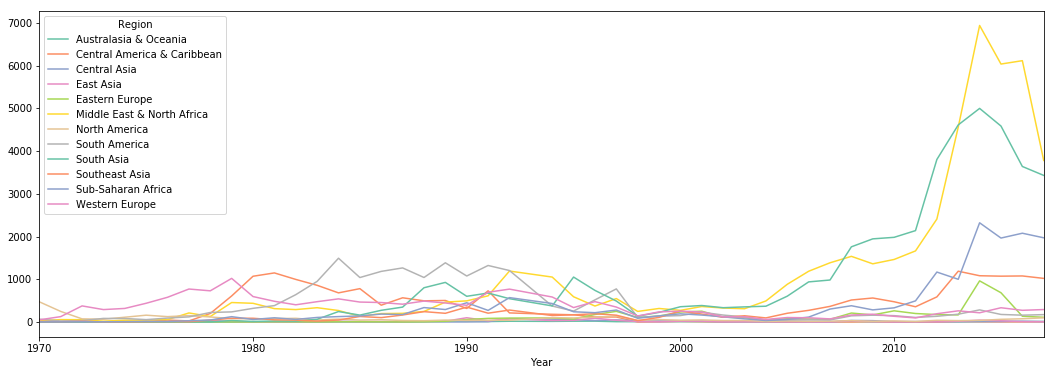

In [0]:
# plot terrorists activities classified by region from 1970 to 2017
terror_region=pd.crosstab(processedData.Year,processedData.Region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()
# since 1970 middle east and south africa had been the playground for terrorist

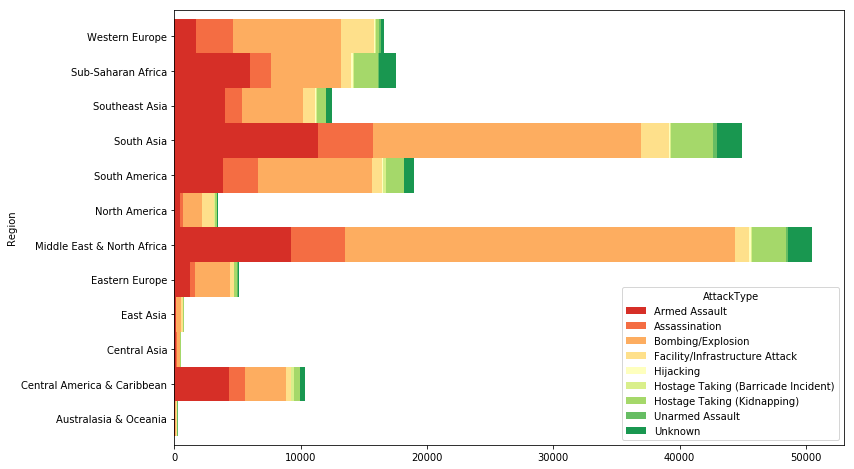

In [0]:
# plot type of attack that is used in different regions
pd.crosstab(processedData.Region,processedData.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()
# it's appeared that bombing is mostly used in middle east and north africa, south asia.

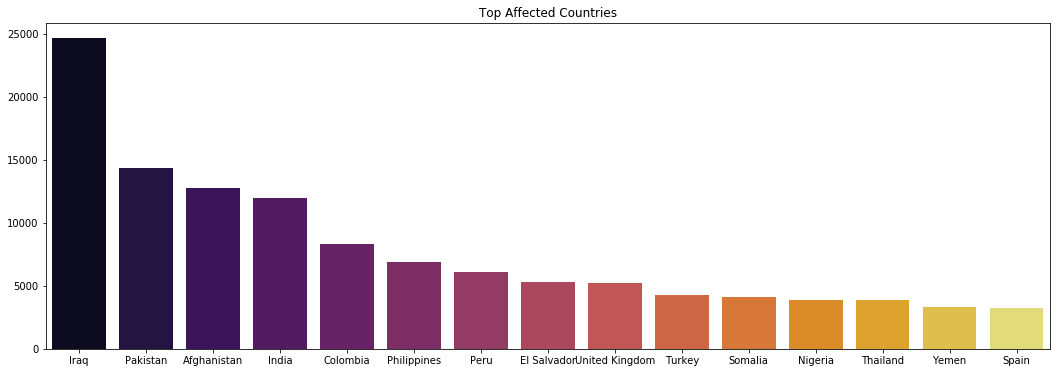

In [0]:
# plot top contries where terrorism occurred
plt.subplots(figsize=(18,6))
sns.barplot(processedData['Country'].value_counts()[:15].index,processedData['Country'].value_counts()[:15].values,palette='inferno')
plt.title('Top Affected Countries')
plt.show()
# No doubt iraq is the highest

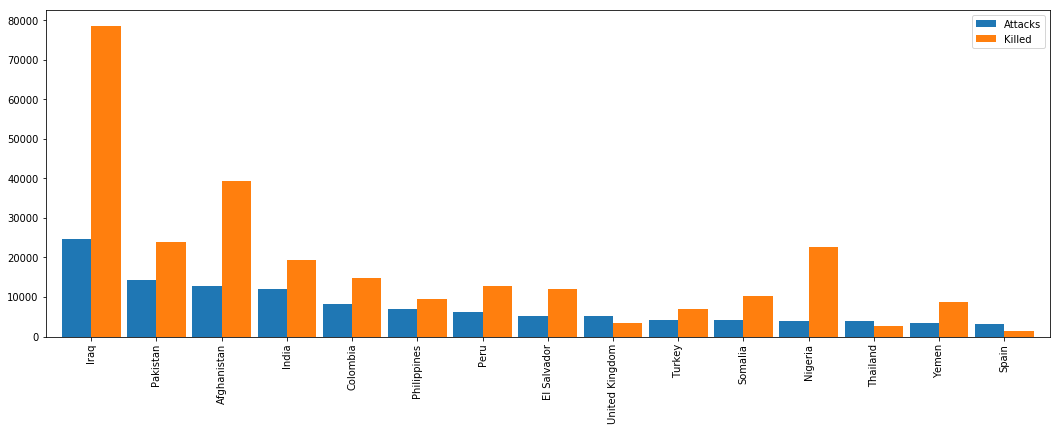

In [0]:
coun_terror=processedData['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=processedData.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()
# iraq again

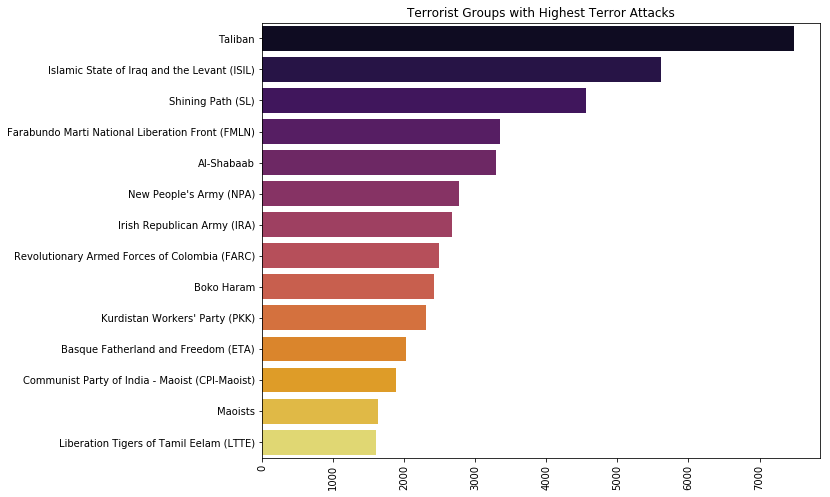

In [0]:
# plot the top terrorist group
sns.barplot(processedData['Group'].value_counts()[1:15].values,processedData['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()
# taliban is a very infamous terrorist group

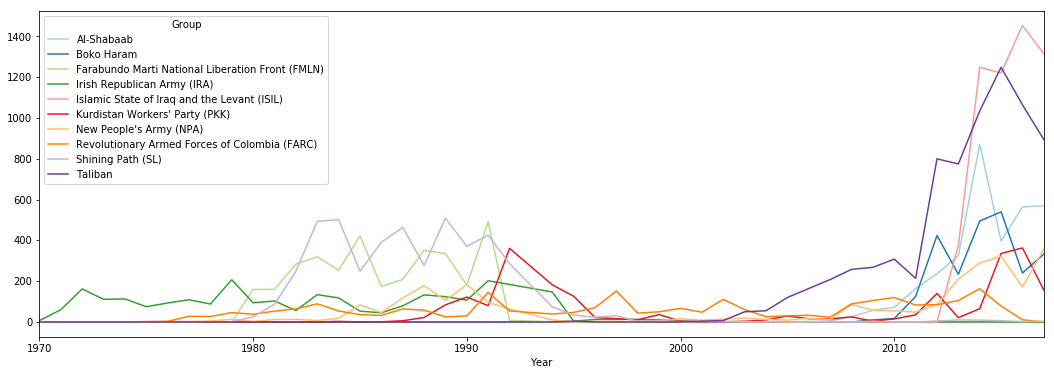

In [0]:
top_groups10=processedData[processedData['Group'].isin(processedData['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()
# from late 90 to early 2000s seemed pretty peaceful

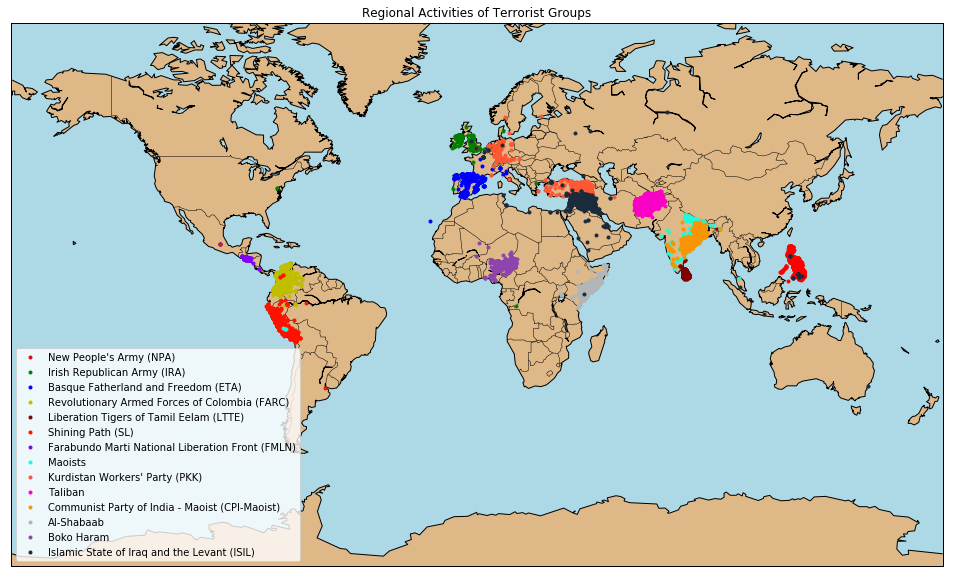

In [0]:
# top group in region
top_groups=processedData[processedData['Group'].isin(processedData[~(processedData["Group"] == 'Unknown')]['Group'].value_counts()[:14].index)]
m4 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
m4.drawcoastlines()
m4.drawcountries()
m4.fillcontinents(color='burlywood',lake_color='lightblue')
m4.drawmapboundary(fill_color='lightblue')
fig=plt.gcf()
fig.set_size_inches(22,10)
colors=['r','g','b','y','#800000','#ff1100','#8202fa','#20fad9','#ff5733','#fa02c6',"#f99504",'#b3b6b7','#8e44ad','#1a2b3c']
group=list(top_groups['Group'].unique())
def group_point(group,color,label):
    lat_group=list(top_groups[top_groups['Group']==group].latitude)
    long_group=list(top_groups[top_groups['Group']==group].longitude)
    x_group,y_group=m4(long_group,lat_group)
    m4.plot(x_group,y_group,'go',markersize=3,color=j,label=i)
for i,j in zip(group,colors):
    group_point(i,j,i)
legend=plt.legend(loc='lower left',frameon=True,prop={'size':10})
frame=legend.get_frame()
frame.set_facecolor('white')
plt.title('Regional Activities of Terrorist Groups')
plt.show()
# mainly in europe and middle east

In [0]:
processedData['Country'].unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [0]:
# terrorism in vietnam
terror_vietnam=processedData[processedData['Country']=='Vietnam']
terror_vietnam_fol=terror_vietnam.copy()
terror_vietnam_fol.dropna(subset=['latitude','longitude'],inplace=True)
location_ind=terror_vietnam_fol[['latitude','longitude']][:5000]
city_ind=terror_vietnam_fol['City'][:5000]
killed_ind=terror_vietnam_fol['Killed'][:5000]
wound_ind=terror_vietnam_fol['Wounded'][:5000]
target_ind=terror_vietnam_fol['Target_type'][:5000]

map4 = folium.Map(location=[14.0583, 108.2772],tiles='CartoDB dark_matter',zoom_start=4.5)
for point in location_ind.index:
    folium.CircleMarker(list(location_ind.loc[point].values),popup='<b>City: </b>'+str(city_ind[point])+'<br><b>Killed: </b>'+str(killed_ind[point])+\
                        '<br><b>Injured: </b>'+str(wound_ind[point])+'<br><b>Target: </b>'+str(target_ind[point])).add_to(map4)
map4

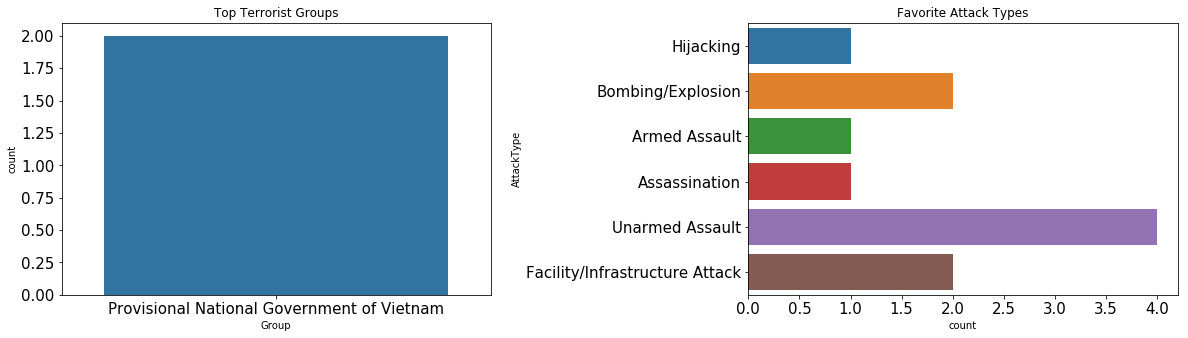

In [0]:
# top terrorist group in vietnam
f,ax=plt.subplots(1,2,figsize=(20,5))
ind_groups=terror_vietnam['Group'].value_counts()[1:11].index
ind_groups=terror_vietnam[terror_vietnam['Group'].isin(ind_groups)]
sns.countplot(x='Group',data=ind_groups,ax=ax[0])
ax[0].set_title('Top Terrorist Groups')
sns.countplot(y='AttackType',data=terror_vietnam[~(terror_vietnam["AttackType"] == "Unknown")],ax=ax[1])
ax[1].set_title('Favorite Attack Types')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()
# but there's only one

MovieWriter imagemagick unavailable. Trying to use pillow instead.
/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.




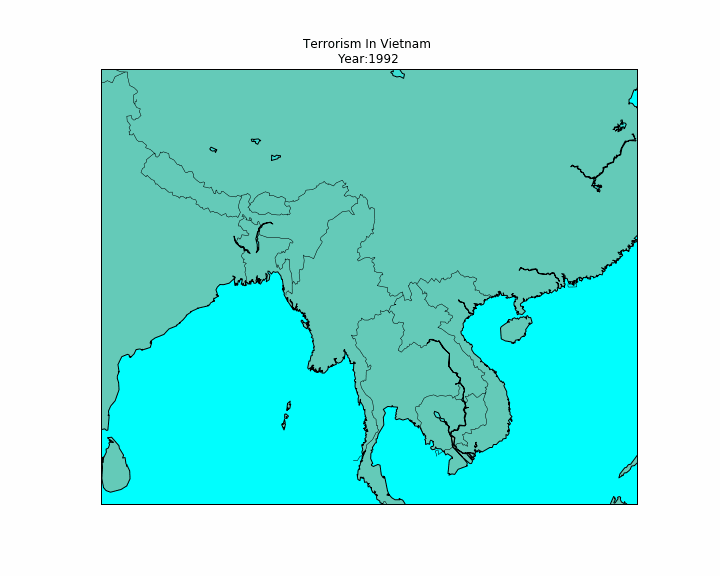

In [0]:
fig = plt.figure(figsize = (10,8))
def animate(Year):
    ax = plt.axes()
    ax.clear()
    ax.set_title('Terrorism In Vietnam '+'\n'+'Year:' +str(Year))
    m5 = Basemap(projection='lcc',resolution='l',llcrnrlon=80,llcrnrlat=5,urcrnrlon=120,urcrnrlat=37,lat_0=14,lon_0=108)
    lat_gif=list(terror_vietnam[terror_vietnam['Year']==Year].latitude)
    long_gif=list(terror_vietnam[terror_vietnam['Year']==Year].longitude)
    x_gif,y_gif=m5(long_gif,lat_gif)
    m5.scatter(x_gif, y_gif,s=[killed+wounded for killed,wounded in zip(terror_vietnam[terror_vietnam['Year']==Year].Killed,terror_vietnam[terror_vietnam['Year']==Year].Wounded)],color = 'r')
    m5.drawcoastlines()
    m5.drawcountries()
    m5.fillcontinents(color='coral',lake_color='aqua', zorder = 1,alpha=0.4)
    m5.drawmapboundary(fill_color='aqua')
ani = animation.FuncAnimation(fig,animate,list(terror_vietnam.Year.unique()), interval = 1500)    
ani.save('animation.gif', writer='imagemagick', fps=1)
plt.close(1)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

MovieWriter imagemagick unavailable. Trying to use pillow instead.
/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.




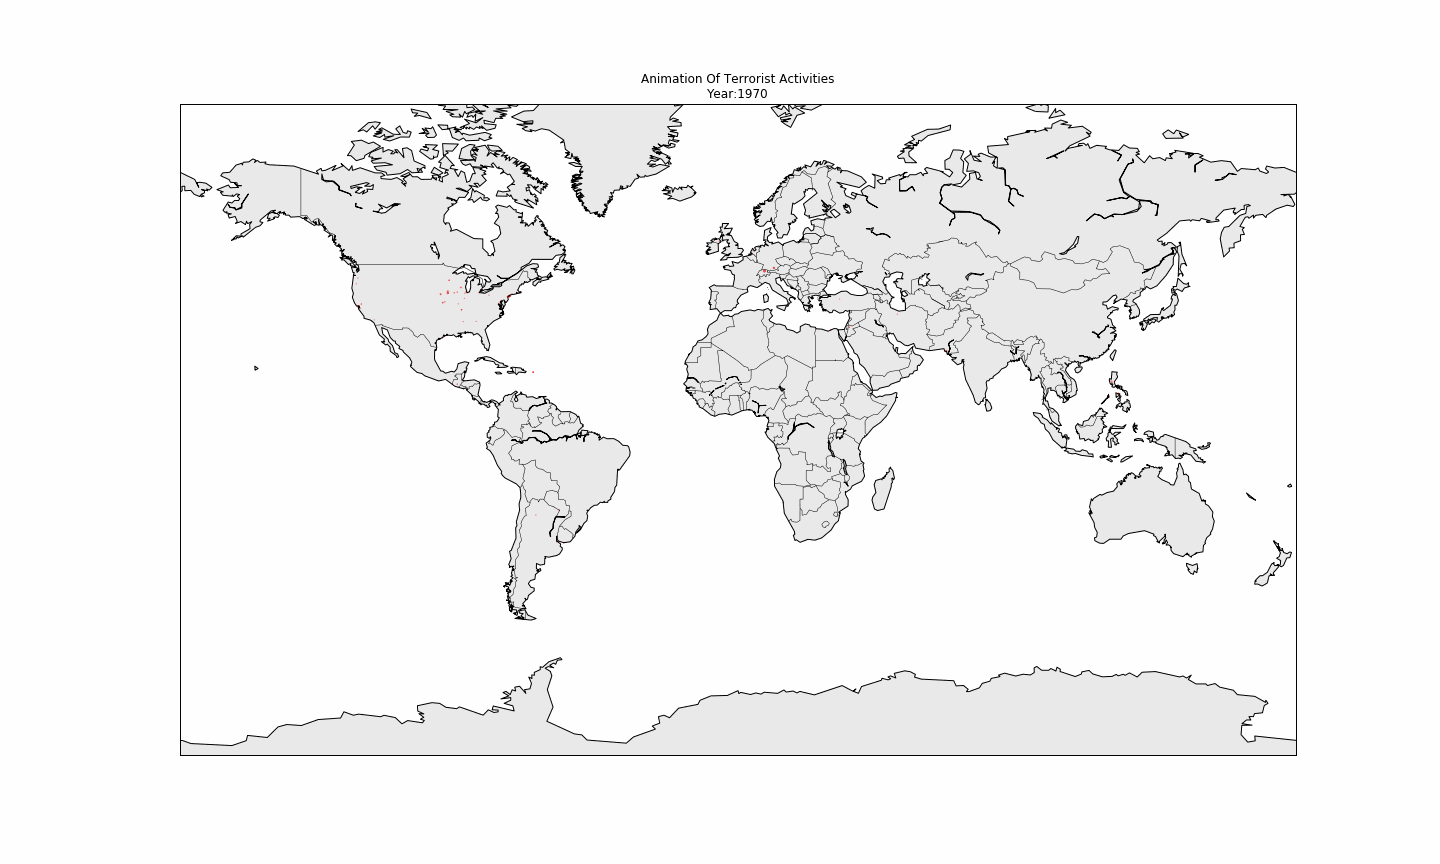

In [0]:
# terorist animation
fig = plt.figure(figsize = (20,12))
def animate(Year):
    ax = plt.axes()
    ax.clear()
    ax.set_title('Animation Of Terrorist Activities'+'\n'+'Year:' +str(Year))
    m6 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
    lat6=list(processedData[processedData['Year']==Year].latitude)
    long6=list(processedData[processedData['Year']==Year].longitude)
    x6,y6=m6(long6,lat6)
    m6.scatter(x6, y6,s=[(kill+wound)*0.1 for kill,wound in zip(processedData[processedData['Year']==Year].Killed,processedData[processedData['Year']==Year].Wounded)],color = 'r')
    m6.drawcoastlines()
    m6.drawcountries()
    m6.fillcontinents(zorder = 1,alpha=0.4)
    m6.drawmapboundary()
ani = animation.FuncAnimation(fig,animate,list(processedData.Year.unique()), interval = 1500)    
ani.save('animation.gif', writer='imagemagick', fps=1)
plt.close(1)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))